In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

In [ ]:
%cd /content
!unzip /content/drive/MyDrive/Yolov4/darknet.zip
%cd /content/darknet

/content
Archive:  /content/drive/MyDrive/Yolov4/darknet.zip
   creating: darknet/
   creating: darknet/.circleci/
  inflating: darknet/.circleci/config.yml  
   creating: darknet/.git/
   creating: darknet/.github/
  inflating: darknet/.github/FUNDING.yml  
   creating: darknet/.github/ISSUE_TEMPLATE/
  inflating: darknet/.github/ISSUE_TEMPLATE/any-other-question-or-issue.md  
  inflating: darknet/.github/ISSUE_TEMPLATE/bug-report.md  
  inflating: darknet/.github/ISSUE_TEMPLATE/feature_request.md  
  inflating: darknet/.github/ISSUE_TEMPLATE/training-issue---no-detections---nan-avg-loss---low-accuracy.md  
   creating: darknet/.github/workflows/
  inflating: darknet/.github/workflows/ccpp.yml  
  inflating: darknet/.github/workflows/on_pr.yml  
  inflating: darknet/.github/workflows/rebase.yml  
  inflating: darknet/.gitignore      
   creating: darknet/.git/branches/
  inflating: darknet/.git/config     
  inflating: darknet/.git/description  
 extracting: darknet/.git/HEAD       
 

In [ ]:
%cd /content/darknet
!rm darknet
!make

/content/darknet
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include obj/image_opencv.o obj/http_stream.o obj/gemm.o obj/utils.o obj/dark_cuda.o obj/convolutional_layer.o obj/list.o obj/image.o obj/activations.o obj/im2col.o obj/col2im.o obj/blas.o obj/crop_layer.o obj/dropout_layer.o obj/maxpool_layer.o obj/softmax_layer.o obj/data.o obj/matrix.o obj/network.o obj/connected_layer.o obj/cost_layer.o obj/parser.o obj/option_list.o obj/darknet.o obj/detection_layer.o obj/captcha.o obj/route_layer.o obj/writing.o obj/box.o obj/nightmare.o obj/normalization_layer.o obj/avgpool_layer.o obj/coco.o obj/dice.o obj/yolo.o obj/detector.o obj/layer.o obj/compare.o obj/classifier.o obj/local_layer.o obj/swag.o obj/shortcut_layer.o ob

In [ ]:
%cd /content/darknet/data
!unzip data.zip

/content/darknet/data
Archive:  data.zip
   creating: data/
 extracting: data/1.png              
  inflating: data/1.txt              
 extracting: data/10.png             
  inflating: data/10.txt             
  inflating: data/11.png             
  inflating: data/11.txt             
 extracting: data/12.png             
  inflating: data/12.txt             
 extracting: data/13.png             
 extracting: data/13.txt             
 extracting: data/14.png             
  inflating: data/14.txt             
 extracting: data/15.png             
 extracting: data/15.txt             
 extracting: data/16.png             
  inflating: data/16.txt             
 extracting: data/17.png             
  inflating: data/17.txt             
 extracting: data/18.png             
  inflating: data/18.txt             
  inflating: data/19.png             
  inflating: data/19.txt             
 extracting: data/2.png              
  inflating: data/2.txt              
 extracting: data/20.png    

In [ ]:
%cd /content/darknet
!./darknet detector train yolo.data cfg/yolov4-custom.cfg yolov4.conv.137 -dont_show 

/content/darknet
 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
yolov4-custom
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 64, time_steps = 1, train = 1 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 con

In [ ]:
%cd /content/darknet
!./darknet detector train yolo.data cfg/yolov4-custom.cfg backup/yolov4-custom_1000.weights -dont_show 

/content/darknet
 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
yolov4-custom
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 64, time_steps = 1, train = 1 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 con

/content/darknet
 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 64, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv     64      

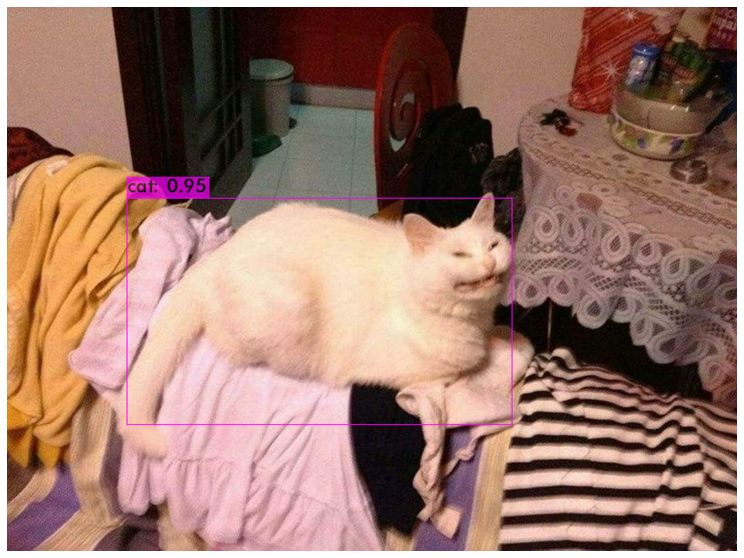

In [ ]:
%cd /content/darknet
!./darknet detect cfg/yolov4-custom.cfg backup/yolov4-custom_1000.weights data/data/val/2.png
imShow('predictions.jpg')